# Lab 6
**Creator**: Lauren Enriquez<br>
**Date**: October 18, 2019

### Align the reads to the human genome

**Command:**
```
bowtie2 -p 4 --very-fast --no-unal -x /data/references/hg19/hg19 -1 /data/Lab6_data/mixed_reads1.fastq -2 /data/Lab6_data/mixed_reads2.fastq -S ~/BioE131-231/Lab_6/output.sam --un-conc ~/BioE131-231/Lab_6/unaligned.fastq
```

**Database:** /data/references/hg19/hg19 <br>
**Input reads:** /data/Lab6_data/mixed_reads1.fastq<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
/data/Lab6_data/mixed_reads2.fastq<br><br>
**Output message:**<br>
```
1285441 reads; of these:
  1285441 (100.00%) were paired; of these:
    1285105 (99.97%) aligned concordantly 0 times
    114 (0.01%) aligned concordantly exactly 1 time
    222 (0.02%) aligned concordantly >1 times
    ----
    1285105 pairs aligned concordantly 0 times; of these:
      227762 (17.72%) aligned discordantly 1 time
    ----
    1057343 pairs aligned 0 times concordantly or discordantly; of these:
      2114686 mates make up the pairs; of these:
        2062758 (97.54%) aligned 0 times
        15162 (0.72%) aligned exactly 1 time
        36766 (1.74%) aligned >1 times
19.76% overall alignment rate
```

**If you use the --un unaligned.fastq option, what will unaligned.fastq contain?** 
<br>
It will contain all the reads that did not align to the human genome (obtained in the database above). <br><br>
**What percentage of your sequencing library came from contaminating human DNA?** <br>
19.76%, which suggests that there was some contamination made by Jamie.

<br>

### Align the reads to the *S. oneidensis* reference genome
**Command:** 
```
bowtie2 -p 4 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -1 ~/BioE131-231/Lab_6/unaligned.1.fastq -2 ~/BioE131-231/Lab_6/unaligned.2.fastq -S ~/BioE131-231/Lab_6/output2.sam --un-conc ~/BioE131-231/Lab_6/unaligned2.fastq
```

**Database:** /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1<br>
**Input reads:** /BioE131-231/Lab_6/unaligned.1.fastq<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
/BioE131-231/Lab_6/unaligned.2.fastq<br>

**Output message:**<br>
```
1285105 reads; of these:
  1285105 (100.00%) were paired; of these:
    1049640 (81.68%) aligned concordantly 0 times
    220987 (17.20%) aligned concordantly exactly 1 time
    14478 (1.13%) aligned concordantly >1 times
    ----
    1049640 pairs aligned concordantly 0 times; of these:
      288853 (27.52%) aligned discordantly 1 time
    ----
    760787 pairs aligned 0 times concordantly or discordantly; of these:
      1521574 mates make up the pairs; of these:
        1245335 (81.85%) aligned 0 times
        221076 (14.53%) aligned exactly 1 time
        55163 (3.63%) aligned >1 times
51.55% overall alignment rate
```
**If you use the --un unaligned.fastq option, what will unaligned.fastq contain?**<br>
It will contain all the reads that did not align (either concordantly or discordantly) to the S. oneidensis reference genome (obtained in the database above). This can be reads from other sources of contamination or even reads linked to human contamination that were not detected in the previous iteration of the bowtie algorithm.<br><br>
**What percentage of your filtered library didn’t align to the reference genome?**<br> 
48.45% of the filtered sequence did not aligned to the S. oneidensis reference genome. <br> <br>
**If you use --very- sensitive instead of --very-fast, does this percentage increase or decrease?**<br>
The overall alignment rate increases to 51.81%. This causes the percentage of the filtered sequence to go down to 48.19% <br>

### Convert SAM to BAM
In the following samtools commands, we convert SAM to BAM, sort the BAM file by coordinates, generate an index by alignment coordinates, then create a .tab file with a list of coordinates and the number of times a read is aligned to that position.

**Commands:**
```
samtools view -b ~/BioE131-231/Lab_6/output2.sam > ~/BioE131-231/Lab_6/output2.bam
samtools sort ~/BioE131-231/Lab_6/output2.bam > ~/BioE131-231/Lab_6/output2.sorted.bam
samtools index ~/BioE131-231/Lab_6/output2.sorted.bam
samtools depth ~/BioE131-231/Lab_6/output2.sorted.bam > ~/BioE131-231/Lab_6/depths.tab
```

### Generate a coverage plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
depths = pd.read_csv('depths.tab',
                     sep ='\t',
                     lineterminator='\n',
                     header = None,
                     names = ['Read', 'Position', 'Depth'])

#### Calculates the mean, max, and min of the coverage across all the positions

In [7]:
print('Mean coverage: ' + str(np.mean(depths['Depth'])))
print('Max coverage: ' + str(max(depths['Depth'])))
print('Min coverage: ' + str(min(depths['Depth'])))

Mean coverage: 70.01027512051236
Max coverage: 472
Min coverage: 1


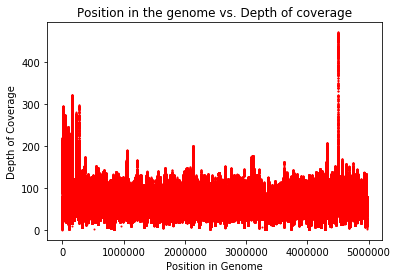

In [10]:
plt.title("Position in the genome vs. Depth of coverage")
plt.xlabel('Position in Genome') 
plt.ylabel('Depth of Coverage')
plt.scatter(x = depths['Position'],y = depths['Depth'], s=1, color = 'red')
plt.show()

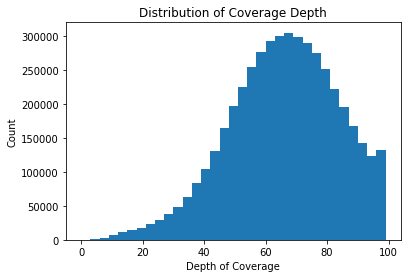

In [8]:
hp = np.array(depths['Depth'])
plt.title("Distribution of Coverage Depth")
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.hist(hp, bins=[x for x in range(100) if x % 3 == 0], range = 100)
plt.show()

### Overall Questions
**How many reads map to humans?**<br>
19.76% <br><br>
**How many map to S. oneidensis?**<br>
51.55% <br><br>
**Do the reads cover the S. oneidensis genome uniformly?**<br>
The coverage is not uniform and some regions have far higher coverage than average (for instance around position 4,500,000) according to the scatterplot. In the histogram, the coverage depth distribution seems to skew to the left (negatively skewed).


### EXTRA CREDIT 1
#### Aligning the reads to the human reference genome:
**Commands:**  
samtools view -b ~/BioE131-231/Lab_6/output.sam > ~/BioE131-231/Lab_6/output.bam <br>
samtools sort ~/BioE131-231/Lab_6/output.bam > ~/BioE131-231/Lab_6/output.sorted.bam <br>
samtools index ~/BioE131-231/Lab_6/output.sorted.bam <br>
samtools depth -a  ~/BioE131-231/Lab_6/output.sorted.bam > ~/BioE131-231/Lab_6/depths2.tab
